### code for videos L3_19_20

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


### Excercise 1:  Estimate e
$ e = \lim_{n \to \infty} \left( 1 + \frac{1}{n} \right)^n $
!['Image not loaded'](.//images/img3_1.png)
this would be computed as e(1) = (1+1/1)^1 = 2 , while e = 2.718

In [2]:
   
def approximate_e(n_values):
    """
    Approximate the value of e using the formula (1 + 1/n)^n for a range of n values.
    
    Parameters:
    n_values (array-like): An array of n values to use for the approximation.
    
    Returns:
    tuple: A tuple containing three elements:
        - approx (numpy.ndarray): The approximated values of e for each n.
        - err (numpy.ndarray): The absolute errors between the approximated values and the true value of e.
        - true_val (float): The true value of e.
    """
    # Initialize arrays for approximations and errors
    approx = np.zeros(len(n_values))
    err = np.zeros(len(n_values))
    
    # True value of e
    true_val = np.exp(1)
    
    # Loop through n values and calculate (1 + 1/n)^n
    for i, n in enumerate(n_values):
        approx[i] = (1 + 1/n)**n
        err[i] = abs(approx[i] - true_val)
    
    return approx, err, true_val



In [ ]:

n_range = np.array([1, 2, 5, 10, 20, 50, 100])
# Print results
exp_approx, errors, exp_true = approximate_e(n_range)
for i, n in enumerate(n_range):
    print(f"n: {n}, Approximation: {exp_approx[i]:.3f}, True Value: {exp_true:.3f}, Error: {errors[i]:.3f}")


Plot error for n = 1:1000

In [ ]:
n_range = np.arange(1, 1001)
# Print results
exp_approx, errors, exp_true = approximate_e(n_range)
# Plot the errors
plt.plot(n_range, errors)
plt.xlabel('n')
plt.ylabel(f'Difference to np.exp(1)')


### plot the following together
!['Image not loaded'](.//images/img3_2.png)

In [ ]:
# input 
x = np.linspace(-2,2,100)
# number of functions
n_func = 5
y = np.zeros((n_func,len(x)))
# fill first row as y= e^x and others too
y[0,:] = np.exp(x)
y[1,:] = np.exp(x**2)
y[2,:] = np.exp((-x)**2)
y[3,:] = np.exp(-x**2)
y[4,:] = (np.exp(-x))**2
plt.figure(figsize=(10,6), facecolor='w', edgecolor='k')
plt.xlabel('x')
plt.ylabel('y')
for i in range(n_func):
    plt.plot(x,y[i,:])    
plt.ylim(-2.0,10.0)
plt.grid()
plt.legend(['$e^x$','$e^{x^2}$','$e^{-x^2}$','$e^{-x^2}$','$(e^{-x})^2$'],loc= 'center left')

### Implement in Sympy the following 
 $ f(\beta) = e{^\beta} - \log(\beta) - 2.7182 $

### check that  x values  created from numpy linspace and range in sympy plot with min and max x values is similar

In [ ]:
sym_beta = sp.var('beta')
sym_y = sp.exp(sym_beta) - sp.log(sym_beta) - sp.exp(1)
xmin = -2
xmax = 2
# Create a plot object, but don't show it yet
p2 = sp.plot(sym_y, (sym_beta, xmin, xmax), show=False)

# Get the x-values used by SymPy for plotting
sympy_x_values = np.array(p2[0].get_data()[0])

# Generate the  linspace array limited to same number of samples
linspace_x_values = np.linspace(xmin, xmax, len(sympy_x_values))  

# Compare the two arrays (you might need some tolerance)
are_close = np.allclose(sympy_x_values, linspace_x_values, atol=1e-6)

print(f"Are the x-values close? {are_close}")

### now implement the expression

In [ ]:
import sympy as sp
x_min = 0.1
x_max= 2
sym_beta = sp.var('beta')
sym_y = sp.exp(sym_beta)- sp.log(sym_beta) - np.exp(1)
# alterantive way to plot with equation specified symbolically
# use grid through matplotlib
from matplotlib import style
style.use('ggplot')
#plot with params
p2 = sp.plot(sym_y, (sym_beta, x_min, x_max), line_color='red', line_style='solid', \
       xlabel='x',ylabel= f'y=f(β)', grid=True,title = f'$f(\\beta)= {sp.latex(sym_y)}$')


### plot previous and using linspace, both in one plot

In [ ]:
# methods comparing other methods of plotting: 
# using input x as entire range of values
beta_values = np.linspace(-2, 2, 1000)  

# plot  2 plots with   ranges specifiedp
p2 = sp.plot(
	(sym_y, (sym_beta, x_min, x_max), {'line_color': 'red', 'line_style': 'dashed'}),
	(sym_y, (sym_beta, np.min(beta_values), np.max(beta_values)), {'line_color': 'blue', 'line_style': 'dashed'}),	
)


### Plot using matplotlib and sympy
(1) using lambdify

In [ ]:
x = np.linspace(x_min, x_max,1000)
# lambdify the function
fx = sp.lambdify(sym_beta, sym_y, 'numpy')
# from sympy to numpy values
yy1 = fx(x)
plt.plot(x,yy1, label = f'$f(\\beta)= {sp.latex(sym_y)}$')

In [ ]:
# Filter out values where beta is positive (to avoid log of negative numbers)
x = np.linspace(x_min, x_max, 1000)  # start from 0.1 to avoid log(0)
# evaluate symbolic expression at each point in beta_values and convert to float
yy2 = [float(sym_y.subs(sym_beta, beta_val).evalf()) for beta_val in x]
plt.plot(x, yy2, label='Using sympy substitution')
plt.grid(True)
plt.legend()

### plot the following graphs in symplot
!['image not found](.//images/img3_3.png)

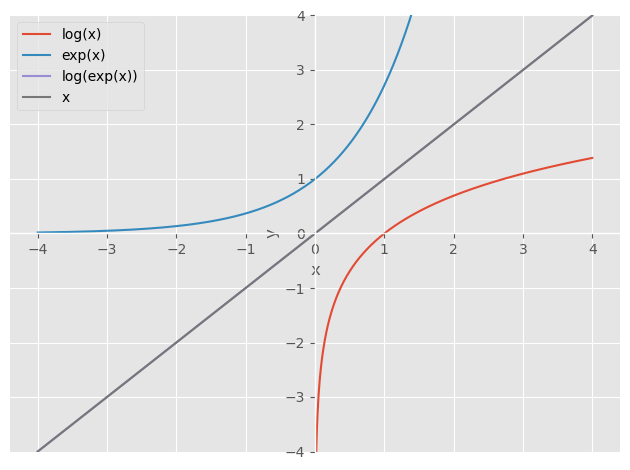

In [26]:
x_min = -4
x_max = 4
sym_x = sp.var('x')
sym_y1 = sp.log(x)
sym_y2 = sp.exp(x)
sym_y3 = sp.log(sp.exp(x))
sym_y4 = sp.exp(sp.log(x))
# cannot change colors in symplot directly
p2 = sp.plot(
	(sym_y1, (sym_x, x_min, x_max),),(sym_y2, (sym_x, x_min, x_max), ),    
	(sym_y3, (sym_x, x_min, x_max), ),(sym_y4, (sym_x, x_min, x_max), ),
	ylim=(-4, 4),xlabel = 'x', ylabel ='y',legend=True)
